In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *
from matplotlib.lines import Line2D

# Phase diagram

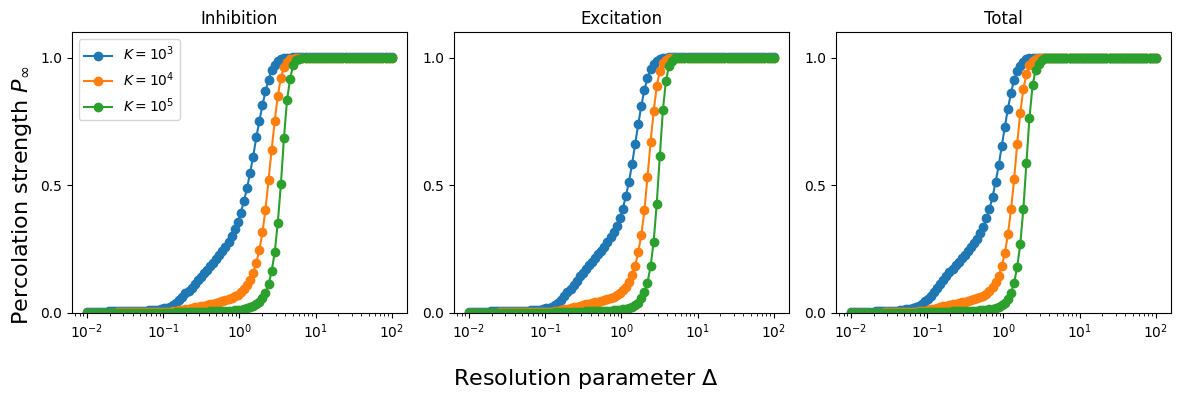

In [2]:
R = 10**3

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)
labels = ['$K=10^3$','$K=10^4$','$K=10^5$','$K=10^6$']
delta = np.logspace(-2, 2, base= 10, num = 100)

ax1 = fig.add_subplot(axgrid[0, 0])
for nmax in [10**3, 10**4, 10**5]:
    ax1.plot(delta, np.load(f'./data/model_perc_I_R={R}_K={nmax}.npy'), marker = 'o')

ax2 = fig.add_subplot(axgrid[0, 1])
for nmax in [10**3, 10**4, 10**5]:
    ax2.plot(delta, np.load(f'./data/model_perc_E_R={R}_K={nmax}.npy'), marker = 'o')

ax3 = fig.add_subplot(axgrid[0, 2])
for nmax in [10**3, 10**4, 10**5]:
    ax3.plot(delta, np.load(f'./data/model_perc_tot_R={R}_K={nmax}.npy'), marker = 'o')

ax1.set_title('Inhibition')
ax2.set_title('Excitation')
ax3.set_title('Total')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)
ax3.set_ylim(0, 1.1)
ax1.set_yticks([0, 0.5, 1])
ax2.set_yticks([0, 0.5, 1])
ax3.set_yticks([0, 0.5, 1])

fig.supylabel('Percolation strength $P_{\infty}$', fontsize = 16)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 16)
ax1.legend(labels = labels)

fig.tight_layout()

# Avalanches stats

In [19]:
R = 10**3
nmax = 10**5
labels = ['$\Delta=10^{-2}$', '$\Delta=10^{-1}$', '$\Delta=1$', '$\Delta= 2$', '$\Delta=3$', '$\Delta= 4$', '$\Delta= 5$' ]

cluster_sizes_E = [np.load(f'./data/model_cluster_sizes_E_R={R}_K={nmax}_delta={delta:.0E}.npy') for delta in [10**-2, 10**-1, 10**0, 2, 3, 4, 5]]
cluster_sizes_I = [np.load(f'./data/model_cluster_sizes_I_R={R}_K={nmax}_delta={delta:.0E}.npy') for delta in [10**-2, 10**-1, 10**0, 2, 3, 4, 5]]
cluster_sizes_tot = [np.load(f'./data/model_cluster_sizes_tot_R={R}_K={nmax}_delta={delta:.0E}.npy') for delta in [10**-2, 10**-1, 10**0, 2, 3, 4, 5]]
cluster_times_E = [np.load(f'./data/model_cluster_times_E_R={R}_K={nmax}_delta={delta:.0E}.npy') for delta in [10**-2, 10**-1, 10**0, 2, 3, 4, 5]]
cluster_times_I = [np.load(f'./data/model_cluster_times_I_R={R}_K={nmax}_delta={delta:.0E}.npy') for delta in [10**-2, 10**-1, 10**0, 2, 3, 4, 5]]
cluster_times_tot = [np.load(f'./data/model_cluster_times_tot_R={R}_K={nmax}_delta={delta:.0E}.npy') for delta in [10**-2, 10**-1, 10**0, 2, 3, 4, 5]]

Modify bins after loading the data, create bins list and bins = bins[i]

In [45]:
s_bins_E =[np.logspace(0, 2, 50), 
           np.logspace(0, 2, 50), 
           np.logspace(0, 3, 50), 
           np.logspace(0, 4, 50), 
           np.logspace(0, 5, 50), 
           np.logspace(0, 5, 50), 
           np.logspace(0, 5, 50)]
t_bins_E = [np.logspace(-5, -1, 50), 
            np.logspace(-3, 1, 50), 
            np.logspace(-2, 3, 50), 
            np.logspace(-3, 4, 50), 
            np.logspace(-2, 5, 50), 
            np.logspace(0, 5, 50), 
            np.logspace(0, 5, 50)]

s_bins_I = [np.logspace(0, 2, 50), 
           np.logspace(0, 2, 50), 
           np.logspace(0, 3, 50), 
           np.logspace(0, 4, 50), 
           np.logspace(0, 5, 50), 
           np.logspace(0, 5, 50), 
           np.logspace(0, 5, 50)]
t_bins_I = [np.logspace(-5, -1, 50), 
            np.logspace(-3, 1, 50), 
            np.logspace(-2, 3, 50), 
            np.logspace(-3, 4, 50), 
            np.logspace(-2, 5, 50), 
            np.logspace(0, 5, 50), 
            np.logspace(0, 5, 50)]

s_bins_t =[np.logspace(0, 2, 50), 
           np.logspace(0, 2, 50), 
           np.logspace(0, 3, 50), 
           np.logspace(0, 4, 50), 
           np.logspace(0, 5, 50), 
           np.logspace(0, 5, 50), 
           np.logspace(0, 5, 50)]
t_bins_t = [np.logspace(-5, -1, 50), 
            np.logspace(-3, 1, 50), 
            np.logspace(-2, 3, 50), 
            np.logspace(-3, 4, 50), 
            np.logspace(-2, 5, 50), 
            np.logspace(0, 5, 50), 
            np.logspace(0, 5, 50)]

In [46]:
s_hist_E = [np.histogram(cluster_sizes_E[i], density= True, bins = s_bins_E[i]) for i in range(len(cluster_sizes_E))]
s_hist_I = [np.histogram(cluster_sizes_I[i], density= True, bins = s_bins_E[i]) for i in range(len(cluster_sizes_E))]
s_hist_tot = [np.histogram(cluster_sizes_tot[i], density= True, bins = s_bins_t[i]) for i in range(len(cluster_sizes_E))]
t_hist_E = [np.histogram(cluster_times_E[i], density= True, bins = t_bins_E[i]) for i in range(len(cluster_sizes_E))]
t_hist_I = [np.histogram(cluster_times_I[i], density= True, bins = t_bins_I[i]) for i in range(len(cluster_sizes_E))]
t_hist_tot = [np.histogram(cluster_times_tot[i], density= True, bins = t_bins_t[i]) for i in range(len(cluster_sizes_E))]

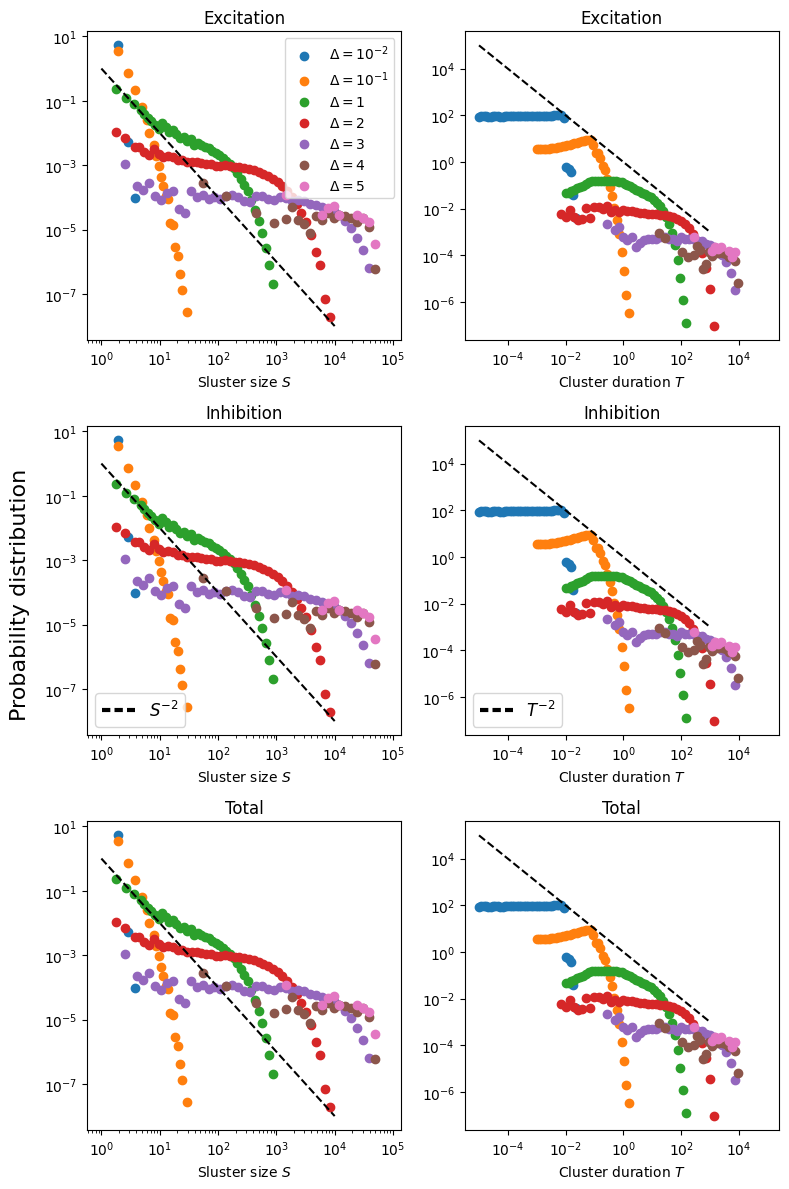

In [47]:
fig, axes = plt.subplots(3, 2, figsize = (8, 12))
for i in range(len(cluster_sizes_E)):
    fig.axes[0].scatter(s_hist_E[i][1][:-1], s_hist_E[i][0], label = labels[i])
    fig.axes[1].scatter(t_hist_E[i][1][:-1], t_hist_E[i][0], label = labels[i])
    fig.axes[2].scatter(s_hist_I[i][1][:-1], s_hist_I[i][0], label = labels[i])
    fig.axes[3].scatter(t_hist_I[i][1][:-1], t_hist_I[i][0], label = labels[i])
    fig.axes[4].scatter(s_hist_tot[i][1][:-1], s_hist_tot[i][0], label = labels[i])
    fig.axes[5].scatter(t_hist_tot[i][1][:-1], t_hist_tot[i][0], label = labels[i])

for ax in fig.axes:
    ax.set_xscale('log')
    ax.set_yscale('log')

fig.supylabel('Probability distribution', fontsize = 16)

ys = np.logspace(0, 4, 20)**-2
yt = np.logspace(-5, 3, 20)**-2**10**-5

for i in range(0, 6, 2):
    fig.axes[i].set_xlabel('Sluster size $S$')
    fig.axes[i].plot(np.logspace(0, 4, 20), ys, 'k--')

for i in range(1, 6, 2):
    fig.axes[i].set_xlabel('Cluster duration $T$')
    fig.axes[i].plot(np.logspace(-5, 3, 20), yt, 'k--')



fig.axes[0].set_title('Excitation')
fig.axes[1].set_title('Excitation')
fig.axes[2].set_title('Inhibition')
fig.axes[3].set_title('Inhibition')
fig.axes[4].set_title('Total')
fig.axes[5].set_title('Total')

fig.axes[0].legend(labels = labels, loc = 'upper right')

fig.axes[3].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=3, linestyle='--')], labels=['$T^{-2}$'], loc = 'lower left', fontsize = 12)
fig.axes[2].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=3, linestyle='--')], labels=['$S^{-2}$'], loc = 'lower left', fontsize = 12)


fig.tight_layout()

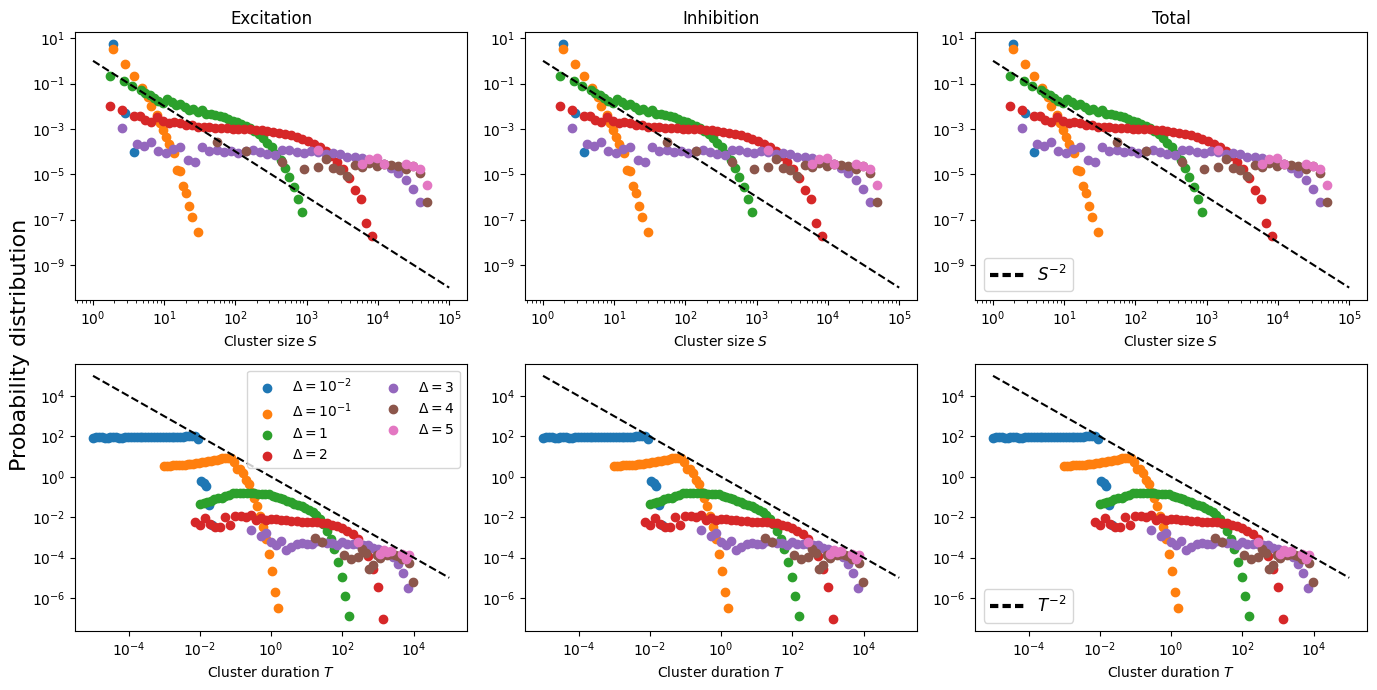

In [51]:
fig, axes = plt.subplots(2, 3, figsize = (14, 7))
for i in range(len(cluster_sizes_E)):
    fig.axes[0].scatter(s_hist_E[i][1][:-1], s_hist_E[i][0], label = labels[i])
    fig.axes[3].scatter(t_hist_E[i][1][:-1], t_hist_E[i][0], label = labels[i])
    fig.axes[1].scatter(s_hist_I[i][1][:-1], s_hist_I[i][0], label = labels[i])
    fig.axes[4].scatter(t_hist_I[i][1][:-1], t_hist_I[i][0], label = labels[i])
    fig.axes[2].scatter(s_hist_tot[i][1][:-1], s_hist_tot[i][0], label = labels[i])
    fig.axes[5].scatter(t_hist_tot[i][1][:-1], t_hist_tot[i][0], label = labels[i])

for ax in fig.axes:
    ax.set_xscale('log')
    ax.set_yscale('log')

fig.supylabel('Probability distribution', fontsize = 16)

ys = np.logspace(0, 5, 20)**-2
yt = np.logspace(-5, 5, 20)**-2**10**-6

for i in range(0, 3):
    fig.axes[i].set_xlabel('Cluster size $S$')
    fig.axes[i].plot(np.logspace(0, 5, 20), ys, 'k--')

for i in range(3, 6):
    fig.axes[i].set_xlabel('Cluster duration $T$')
    fig.axes[i].plot(np.logspace(-5, 5, 20), yt, 'k--')



fig.axes[0].set_title('Excitation')
fig.axes[1].set_title('Inhibition')
fig.axes[2].set_title('Total')

fig.axes[3].legend(labels = labels, ncols = 2, loc = 'best')

fig.axes[5].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=3, linestyle='--')], labels=['$T^{-2}$'], loc = 'lower left', fontsize = 12)
fig.axes[2].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=3, linestyle='--')], labels=['$S^{-2}$'], loc = 'lower left', fontsize = 12)


fig.tight_layout()